<a href="https://colab.research.google.com/github/zhus-dika/DL_home_works/blob/main/hw3_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 3. Обработка текстов.

### Общая информация

Дата выдачи: 13.01.2022

Мягкий дедлайн: 23:59MSK 6.02.2022

Жесткий дедлайн: 23:59MSK 10.02.2022

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{penalty} = M_{full} \cdot 0.85^{t/1440}$, где $M_{full}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать перед самым жестким дедлайном, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В данном домашнем задании вам предстоит предсказывать пользовательскую оценку отеля по тексту отзыва. Нужно обучиться на данных с кэггла и заслать в [соревнование](https://www.kaggle.com/t/3e8fa6cec6d048bf8e93fb72e441d88c) предикт. По той же ссылке можете скачать данные.

Мы собрали для вас отзывы по 1500 отелям из совершенно разных уголков мира. Что это за отели - секрет. Вам дан текст отзыва и пользовательская оценка отеля. Ваша задача - научиться предсказывать оценку отеля по отзыву.

Главная метрика - Mean Absolute Error (MAE). Во всех частях домашней работы вам нужно получить значение MAE не превышающее 0.92 на публичном лидерборде. В противном случае мы будем вынуждены не засчитать задание :(

#### Про данные:
Каждое ревью состоит из двух текстов: positive и negative - плюсы и минусы отеля. В столбце score находится оценка пользователя - вещественное число 0 до 10. Вам нужно извлечь признаки из этих текстов и предсказать по ним оценку.

Для локального тестирования используйте предоставленное разбиение на трейн и тест.

Good luck & have fun! 💪

#### Использовать любые данные для обучения кроме предоставленных организаторами строго запрещено. В последней части можно использовать предобученные модели из библиотеки `transformers`.

#### 🦚 Read data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
PATH_TO_TRAIN_DATA = '/content/drive/MyDrive/hse/DL/train.csv'
PATH_TO_TEST_DATA = '/content/drive/MyDrive/hse/DL/test.csv'
# PATH_TO_TRAIN_DATA = 'train.csv'
# PATH_TO_TEST_DATA = 'test.csv'

In [3]:
import pandas as pd
from tqdm.notebook import tqdm
import string
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

df = pd.read_csv(PATH_TO_TRAIN_DATA)
df_competition = pd.read_csv(PATH_TO_TEST_DATA)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,review_id,negative,positive,score
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7


In [4]:
df.shape

(100000, 4)

Предобработка текста может сказываться на качестве вашей модели.
Сделаем небольшой препроцессинг текстов: удалим знаки препинания, приведем все слова к нижнему регистру.
Однако можно не ограничиваться этим набором преобразований. Подумайте, что еще можно сделать с текстами, чтобы помочь будущим моделям? Добавьте преобразования, которые могли бы помочь по вашему мнению.

Также мы добавили разбиение текстов на токены. Теперь каждая строка-ревью стала массивом токенов.

### 🦜 Using Lemmas

In [ ]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 57.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=aa3758ad56cb82806f26d140fca5f9109556eeabcac2414e63f1ed574f8fe76e
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import re
from pymorphy2 import MorphAnalyzer
from functools import lru_cache
from nltk.corpus import stopwords
nltk.download('stopwords')

m = MorphAnalyzer()
regex = re.compile("[А-Яа-яA-z]+")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
@lru_cache(maxsize=128)

def words_only(text, regex=regex):
    try:
        return regex.findall(text.lower())
    except:
        return []

def lemmatize_word(token, pymorphy=m):
    return pymorphy.parse(token)[0].normal_form

def lemmatize_text(text):
    return [lemmatize_word(w) for w in text]


mystopwords = stopwords.words('russian')
def remove_stopwords(lemmas, stopwords = mystopwords):
    return [w for w in lemmas if not w in stopwords and len(w) > 3]

def clean_text(text):
    tokens = words_only(text)
    lemmas = lemmatize_text(tokens)

    return ' '.join(remove_stopwords(lemmas))

In [ ]:
df['text'] = df.apply(lambda row: row.positive + row.negative, axis=1)
df_competition['text'] = df_competition.apply(lambda row: row.positive + row.negative, axis=1)

In [ ]:
from multiprocessing import Pool
from tqdm import tqdm

with Pool(4) as p:
    lemmas = list(tqdm(p.imap(clean_text, df['text']), total=len(df)))
with Pool(4) as p:
     lemmas_test = list(tqdm(p.imap(clean_text, df_competition['text']), total=len(df_competition)))

df['lemmas'] = lemmas
df_competition['lemmas'] = lemmas_test
df.sample(5)

100%|██████████| 20000/20000 [00:26<00:00, 748.81it/s]


,review_id,negative,positive,score,text,lemmas
23137,3ba3878d8fb1c5c49d334add96030431,None,Perfect for a short stay Prompt service and h...,9.2,Perfect for a short stay Prompt service and h...,perfect short stay prompt service help yoursel...
63562,a2a6cd20861c18d694e5b3e9f5d2b8c3,I booked s room but was told it is so tiny it...,Ideal location Gabriel at reception was v hel...,6.3,Ideal location Gabriel at reception was v hel...,ideal location gabriel reception helpful booke...
90277,e6fc2ff0536840db6e1b61e2b98f3877,The room was very small and didn t have a bat...,No Positive,7.5,No Positive The room was very small and didn t...,positive room very small didn have bath condit...
90353,e729b0e9fdb28a5fe841826a10f19a5a,The disadvantage of the central location was ...,A centrally located hotel with a superb staff...,9.6,A centrally located hotel with a superb staff...,centrally located hotel with superb staff rece...
37667,60eb869a69bf2a2248bbf39e9f019671,The weather Cold but it was March,Huge comfy bed lovely decor staff always will...,9.2,Huge comfy bed lovely decor staff always will...,huge comfy lovely decor staff always willing h...


### 🐙 Using process text

In [ ]:
def process_text(text):
    return [word for word in word_tokenize(text.lower()) if word not in string.punctuation]

In [ ]:
# df['negative'] = df['negative'].apply(process_text)
# df['positive'] = df['positive'].apply(process_text)
# df_competition['negative'] = df_competition['negative'].apply(process_text)
# df_competition['positive'] = df_competition['positive'].apply(process_text)

## Часть 1. 1 балл

Обучите логистическую или линейную регрессию на TF-IDF векторах текстов.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['review_id', 'text']], df.score)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(ngram_range=(1, 2)), 'text'), #TfidfVectorizer accepts column name only between quotes
    ]
)
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

In [ ]:
# TfidfVectorizer(ngram_range=(1, 2)), 'text') & LinearRegression
pipe.fit(X_train, y_train)
print(f'Train acc: {mean_absolute_error(y_train, pipe.predict(X_train)):.4f}')
print(f'Test acc: {mean_absolute_error(y_test, pipe.predict(X_test)):.4f}')

Train acc: 0.0478
Test acc: 1.7417


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(ngram_range=(1, 2)), 'text'), #TfidfVectorizer accepts column name only between quotes
    ]
)
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=0.82))
    ]
)

In [ ]:
# TfidfVectorizer(ngram_range=(1, 2)), 'text') & Ridge(alpha=0.82)
pipe.fit(X_train, y_train)
print(f'Train acc: {mean_absolute_error(y_train, pipe.predict(X_train)):.4f}')
print(f'Test acc: {mean_absolute_error(y_test, pipe.predict(X_test)):.4f}')

Train acc: 0.5383
Test acc: 0.8627


Предскажите этой моделью тестовые данные из [соревнования](https://www.kaggle.com/t/3e8fa6cec6d048bf8e93fb72e441d88c) и сделайте сабмит. Какой у вас получился скор? Прикрепите скриншот из кэггла.

In [ ]:
competition_pred = pipe.predict(df_competition[['review_id', 'text']])

In [ ]:
df_res = df_competition.drop(['positive', 'negative', 'text', 'lemmas'], axis=1)
df_res = df_res.assign(score=competition_pred)
df_res

,review_id,score
0,00026f564b258ad5159aab07c357c4ca,2.452586
1,000278c73da08f4fcb857fcfe4ac6417,7.911474
2,000404f843e756fe3b2a477dbefa5bd4,8.399026
3,000a66d32bcf305148d789ac156dd512,8.379324
4,000bf1d8c5110701f459ffbedbf0d546,9.272559
...,...,...
19995,ffe8a7190aee6e3a53ee2e0145a91555,7.356211
19996,ffea0e2b84788c9df755efe8e2bedb23,8.672618
19997,fff3997a85a1eed7ae7a937bc945fcf0,11.457139
19998,fff673fe95ab8f3a0910f112549862e2,9.835557


In [ ]:
df_res.to_csv('/content/drive/MyDrive/hse/DL/results.csv', index=False)

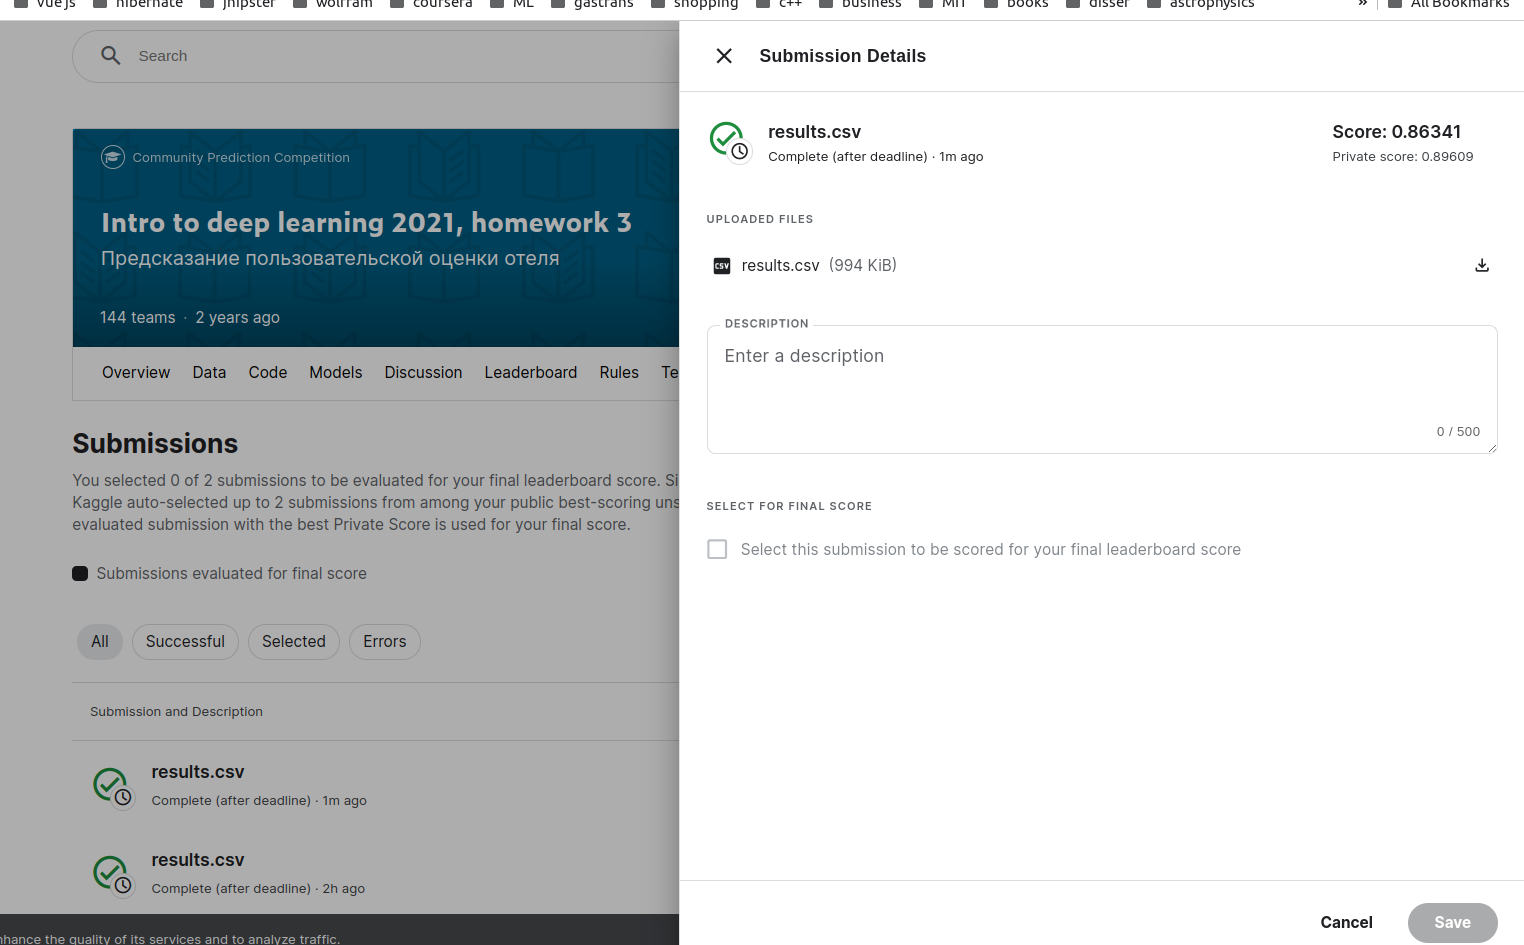

## Часть 2. 2 балла

Обучите логистическую или линейную регрессию на усредненных Word2Vec векторах.

### Word2Vec

#### 🦍 Read data

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
!pip install torchtext==0.6.0

In [ ]:
import torchtext

assert torchtext.__version__ == '0.6.0'

In [ ]:
def process_text(text):
    return [word for word in word_tokenize(text.lower())]# if word not in string.punctuation]

In [ ]:
df['text'] = df.apply(lambda row: row.positive + row.negative, axis=1)
df_competition['text'] = df_competition.apply(lambda row: row.positive + row.negative, axis=1)
df['negative'] = df['negative'].apply(process_text)
df['positive'] = df['positive'].apply(process_text)
df_competition['negative'] = df_competition['negative'].apply(process_text)
df_competition['positive'] = df_competition['positive'].apply(process_text)
df['text_lst'] = df.apply(lambda row: row.positive + row.negative, axis=1)
df_competition['text_lst'] = df_competition.apply(lambda row: row.positive + row.negative, axis=1)

In [ ]:
def get_sentence_embedding(sent):
    embeds = []
    for word in sent:
        embeds += [get_word_embed(word).cpu().data.numpy()]

    return np.stack(embeds, axis=0).mean(0)

In [ ]:
def calc_idf(texts):
  N = len(texts)
  vocab = []
  for i in texts:
    vocab += i
  vocab = set(vocab)
  tD = {}
  for word in tqdm(vocab):
    tD[word] = 0
    for sent in texts:
      if word in sent:
        tD[word] += 1
  IDF = {}
  import math
  for (term,term_frequency) in tD.items():
    IDF[term] = math.log(float(N) / term_frequency)
  return IDF

In [ ]:
def get_sentence_embedding_idf(sent, IDF):
    embeds = []
    for word in sent:
        embeds += [IDF[word] * get_word_embed(word).cpu().data.numpy()]

    return np.stack(embeds, axis=0).sum(0)

#### 🦜 Train model word2vec

In [ ]:
import torch
import numpy as np
from torch import nn
from torch.utils.data import Dataset, DataLoader
from collections import Counter

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator, Vocab

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 14})

In [ ]:
SKIPGRAM_N_WORDS = 4
MIN_WORD_FREQUENCY = 10 #20
MAX_SEQUENCE_LENGTH = 256

EMBED_DIM = 320
EMBED_MAX_NORM = 1
BATCH_SIZE = 16

In [ ]:
tokenizer = get_tokenizer("basic_english", language="en")

def load_and_preprocess_dataset(path):
    with open(path, 'r') as file:
        lines = file.readlines()

    data = list(filter(
        lambda sent: len(sent) > SKIPGRAM_N_WORDS * 2,
        map(tokenizer, lines)
    ))
    return data

In [ ]:
mask = df.apply(lambda row: len(row.positive) == 0 & len(row.negative) == 0, axis=1)
df = df[~mask]
df.shape

(99973, 6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text_lst'], df.score)

In [ ]:
train_data = X_train.values#load_and_preprocess_dataset(TRAIN_TOKENS)
valid_data = X_test.values#load_and_preprocess_dataset(VALID_TOKENS)
comp_data = df_competition['text_lst'].values

# total_train_tokens = sum(len(sent) for sent in train_data)
# total_valid_tokens = sum(len(sent) for sent in valid_data)

# print(f'Num sentences: train - {len(train_data)}, valid - {len(valid_data)}')
# print(f'Total tokens: train - {total_train_tokens}, valid - {total_valid_tokens}')
# print(f'Average tokens in sentence: {total_train_tokens / len(train_data):.2f}')

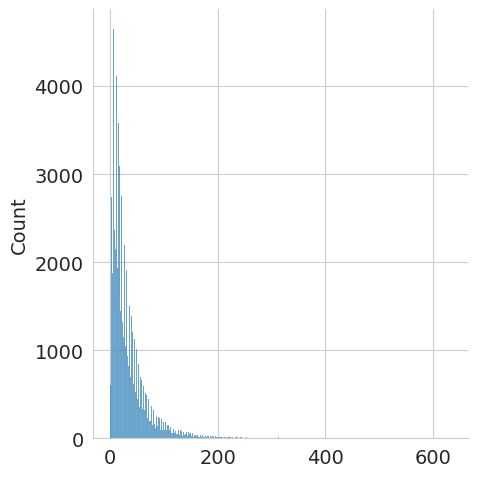

In [ ]:
_ = sns.displot([len(sent) for sent in train_data])

In [ ]:
counter = Counter(token for sent in train_data for token in sent)

In [ ]:
len(counter)

30276

In [ ]:
vocab = Vocab(counter, min_freq=MIN_WORD_FREQUENCY, specials=['<unk>'])

VOCAB_SIZE = len(vocab)
print(f'Vocab size: {VOCAB_SIZE}')

Vocab size: 6019


In [ ]:
def sent_to_idx(sent):
    return [vocab[token] for token in sent]


def collate_fn(batch):
    """
    Collate_fn for Skip-Gram model to be used with Dataloader.
    `batch` is expected to be list of text paragrahs.

    Context is represented as N=SKIPGRAM_N_WORDS past words
    and N=SKIPGRAM_N_WORDS future words.

    Long paragraphs will be truncated to contain
    no more that MAX_SEQUENCE_LENGTH tokens.

    Each element in `batch_input` is a middle word.
    Each element in `batch_output` is a context word.
    """
    batch_input, batch_output = [], []
    for text in batch:
        text_tokens_ids = sent_to_idx(text)

        if MAX_SEQUENCE_LENGTH:
            text_tokens_ids = text_tokens_ids[:MAX_SEQUENCE_LENGTH]

        for idx in range(len(text_tokens_ids) - SKIPGRAM_N_WORDS * 2):
            token_id_sequence = text_tokens_ids[idx : (idx + SKIPGRAM_N_WORDS * 2 + 1)]
            input_ = token_id_sequence.pop(SKIPGRAM_N_WORDS)
            outputs = token_id_sequence

            batch_input += [input_] * len(outputs)
            batch_output += outputs

    batch_input = torch.tensor(batch_input, dtype=torch.long)
    batch_output = torch.tensor(batch_output, dtype=torch.long)
    return batch_input, batch_output

In [ ]:
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, num_workers=4,
                          pin_memory=True, collate_fn=collate_fn, shuffle=True)
valid_loader = DataLoader(valid_data, batch_size=BATCH_SIZE, num_workers=4,
                          pin_memory=True, collate_fn=collate_fn)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
from IPython.display import clear_output
from tqdm.notebook import tqdm


def plot_losses(train_losses, valid_losses):
    clear_output()
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='train', color='deepskyblue', linewidth=2)
    plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='valid', color='springgreen', linewidth=2)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

In [ ]:
def training_epoch(model, optimizer, criterion, train_loader, tqdm_desc):
    train_loss, num_batches = 0.0, 1
    model.train()
    for inputs, outputs in tqdm(train_loader, desc=tqdm_desc):
        inputs = inputs.to(device)
        outputs = outputs.to(device)

        optimizer.zero_grad()
        logits = model(inputs)
        loss = criterion(logits, outputs)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        num_batches += 1

    train_loss /= num_batches
    return train_loss


@torch.no_grad()
def validation_epoch(model, criterion, valid_loader, tqdm_desc):
    valid_loss, num_batches = 0.0, 0
    model.eval()
    for inputs, outputs in tqdm(valid_loader, desc=tqdm_desc):
        inputs = inputs.to(device)
        outputs = outputs.to(device)

        logits = model(inputs)
        loss = criterion(logits, outputs)

        valid_loss += loss.item()
        num_batches += 1

    valid_loss /= num_batches
    return valid_loss


def train(model, optimizer, scheduler, criterion, train_loader, valid_loader, num_epochs):
    train_losses, valid_losses = [], []

    for epoch in range(1, num_epochs + 1):
        train_loss = training_epoch(
            model, optimizer, criterion, train_loader,
            tqdm_desc=f'Training {epoch}/{num_epochs}'
        )
        valid_loss = validation_epoch(
            model, criterion, valid_loader,
            tqdm_desc=f'Validating {epoch}/{num_epochs}'
        )

        if scheduler is not None:
            scheduler.step()

        train_losses += [train_loss]
        valid_losses += [valid_loss]
        plot_losses(train_losses, valid_losses)

In [ ]:
class Word2VecModel(nn.Module):
    def __init__(self, embed_dim, embed_max_norm, vocab_size):
        super().__init__()
        self.embeds = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embed_dim,
                                   max_norm=embed_max_norm)
        self.decoder = nn.Linear(embed_dim, vocab_size)

    def forward(self, tokens):
        embeds = self.embeds(tokens)
        logits = self.decoder(embeds)
        return logits

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
NUM_EPOCHS = 10
model = Word2VecModel(embed_dim=EMBED_DIM, embed_max_norm=EMBED_MAX_NORM,
                      vocab_size=VOCAB_SIZE).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, NUM_EPOCHS)
criterion = nn.CrossEntropyLoss()

In [ ]:
sum(param.numel() for param in model.parameters())

3858179

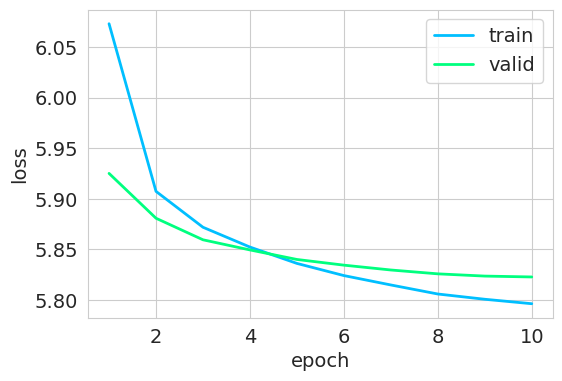

In [ ]:
train(model, optimizer, scheduler, criterion, train_loader, valid_loader, NUM_EPOCHS)

#### 🐌 Predict hotel score size of embedding = 320

In [ ]:
embed_matrix = model.embeds.weight.detach()
embed_norms = (embed_matrix ** 2).sum(1).sqrt()

In [ ]:
train_embeds320 = np.stack([get_sentence_embedding(sent) for sent in train_data], axis=0)
test_embeds320 = np.stack([get_sentence_embedding(sent) for sent in valid_data], axis=0)

In [ ]:
lin_regr = LinearRegression().fit((train_embeds320), y_train)

print(f'Train acc: {mean_absolute_error(y_train,lin_regr.predict(train_embeds320)):.4f}')
print(f'Test acc: {mean_absolute_error(y_test, lin_regr.predict(test_embeds320)):.4f}')

Train acc: 0.9886
Test acc: 0.9946


🦚 Using IDF

In [ ]:
IDF = calc_idf(X_train.values)

In [ ]:
IDF_TEST = calc_idf(X_test.values)

  0%|          | 0/17285 [00:00<?, ?it/s]

In [ ]:
train_embeds_idf320 = np.stack([get_sentence_embedding_idf(sent, IDF) for sent in train_data], axis=0)

In [ ]:
test_embeds_idf320 = np.stack([get_sentence_embedding_idf(sent, IDF_TEST) for sent in valid_data], axis=0)

In [ ]:
lin_regr = LinearRegression().fit((train_embeds_idf320), y_train)

print(f'Train acc: {mean_absolute_error(y_train,lin_regr.predict(train_embeds_idf320)):.4f}')
print(f'Test acc: {mean_absolute_error(y_test, lin_regr.predict(test_embeds_idf320)):.4f}')

Train acc: 1.0069
Test acc: 1.0158


#### 🦔 Predict hotel score size of embedding = 300

In [ ]:
embed_matrix = model.embeds.weight.detach()
embed_norms = (embed_matrix ** 2).sum(1).sqrt()

In [ ]:
train_embeds300 = np.stack([get_sentence_embedding(sent) for sent in train_data], axis=0)
test_embeds300 = np.stack([get_sentence_embedding(sent) for sent in valid_data], axis=0)

In [ ]:
comp_embeds300 = np.stack([get_sentence_embedding(sent) for sent in comp_data], axis=0)

In [ ]:
lin_regr = LinearRegression().fit((train_embeds300), y_train)

print(f'Train acc: {mean_absolute_error(y_train,lin_regr.predict(train_embeds300)):.4f}')
print(f'Test acc: {mean_absolute_error(y_test, lin_regr.predict(test_embeds300)):.4f}')

Train acc: 0.9937
Test acc: 0.9982


In [ ]:
competition_pred = lin_regr.predict(comp_embeds300)

In [ ]:
df_res = df_competition.drop(['positive', 'negative', 'text', 'text_lst'], axis=1)
df_res = df_res.assign(score=competition_pred)
df_res

,review_id,score
0,00026f564b258ad5159aab07c357c4ca,6.992311
1,000278c73da08f4fcb857fcfe4ac6417,9.169971
2,000404f843e756fe3b2a477dbefa5bd4,7.138039
3,000a66d32bcf305148d789ac156dd512,8.107358
4,000bf1d8c5110701f459ffbedbf0d546,9.636403
...,...,...
19995,ffe8a7190aee6e3a53ee2e0145a91555,6.135415
19996,ffea0e2b84788c9df755efe8e2bedb23,9.173002
19997,fff3997a85a1eed7ae7a937bc945fcf0,9.501893
19998,fff673fe95ab8f3a0910f112549862e2,7.775361


In [ ]:
df_res.to_csv('/content/drive/MyDrive/hse/DL/results.csv', index=False)

#### 🐦 Predict hotel score size of embedding = 256

In [ ]:
embed_matrix = model.embeds.weight.detach()
embed_norms = (embed_matrix ** 2).sum(1).sqrt()

In [ ]:
index = vocab['really']

In [ ]:
embed_vector = torch.clone(embed_matrix[index])
embed_vector[0]

tensor(-0.0160, device='cuda:0')

In [ ]:
def get_word_embed(token):
  return torch.clone(embed_matrix[vocab[token]])

In [ ]:
train_embeds256 = np.stack([get_sentence_embedding(sent) for sent in train_data], axis=0)
test_embeds256 = np.stack([get_sentence_embedding(sent) for sent in valid_data], axis=0)

In [ ]:
lin_regr = LinearRegression().fit((train_embeds256), y_train)

In [ ]:
print(f'Train acc: {mean_absolute_error(y_train,lin_regr.predict(train_embeds256)):.4f}')
print(f'Test acc: {mean_absolute_error(y_test, lin_regr.predict(test_embeds256)):.4f}')

Train acc: 0.9930
Test acc: 1.0048


### 🦓 Using FastText

In [ ]:
!pip install fasttext

  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199767 sha256=d0eed36edba259f6ddf7d1035b3dad0eae3e1a9b1a9d7211c0fe6be08855f5c4
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
import fasttext
import fasttext.util
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 14})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['review_id', 'text']], df.score)

In [ ]:
X_train['text_lst'] = X_train.apply(lambda row: row.text.split(), axis=1)
X_test['text_lst'] = X_test.apply(lambda row: row.text.split(), axis=1)
df_competition['text_lst'] = df_competition.apply(lambda row: row.text.split(), axis=1)

In [ ]:
X_train.sample(7)

,review_id,text,text_lst
360,00f2e3ee1c108b797e546e3d43e7e3d3,Very well located modern clean room nice staf...,"[Very, well, located, modern, clean, room, nic..."
26274,4392ef2a9f411f9f09ca354ba4db7fe4,Excellent location as tram stops right across...,"[Excellent, location, as, tram, stops, right, ..."
71999,b879194d52098aa5cbaf5bd8bc98ccca,I loved the food at the restaurant No Negative,"[I, loved, the, food, at, the, restaurant, No,..."
34369,586ded095b2c5c9da4866a0e05d86d9f,very friendly and client service minded staff...,"[very, friendly, and, client, service, minded,..."
48914,7d752ef14129ba5b43f9ea9dd7d41de3,The convenient size of the room and proper lo...,"[The, convenient, size, of, the, room, and, pr..."
4820,0c91089093ae0a5ac8c2798aa290891a,amazing staff members Perfect location for to...,"[amazing, staff, members, Perfect, location, f..."
8962,175925a2f8a6f584877b201b4a2d8401,Location and breakfastNo Negative,"[Location, and, breakfastNo, Negative]"


In [ ]:
fasttext.util.download_model('en', if_exists='ignore')
ft = fasttext.load_model('cc.en.300.bin')

In [ ]:
def get_sentence_embedding(sent):
    embeds = []
    for word in sent:
        embeds += [ft.get_word_vector(word)]

    return np.stack(embeds, axis=0).mean(0)

In [ ]:
mask = X_train.apply(lambda row: len(row.text_lst) > 0, axis=1)
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

In [ ]:
mask = X_test.apply(lambda row: len(row.text_lst) > 0, axis=1)
X_test_clean = X_test[mask]
y_test_clean = y_test[mask]

In [ ]:
train_embeds = np.stack([get_sentence_embedding(sent) for sent in X_train_clean['text_lst'].values], axis=0)
test_embeds = np.stack([get_sentence_embedding(sent) for sent in X_test_clean['text_lst'].values], axis=0)

In [ ]:
lin_regr = LinearRegression().fit((train_embeds), y_train_clean)

In [ ]:
print(f'Train acc: {mean_absolute_error(y_train_clean,lin_regr.predict(train_embeds)):.4f}')
print(f'Test acc: {mean_absolute_error(y_test_clean, lin_regr.predict(test_embeds)):.4f}')

Train acc: 1.0335
Test acc: 1.0464


In [ ]:
ridge = Ridge(alpha=0.45).fit((train_embeds), y_train_clean)

In [ ]:
print(f'Train acc: {mean_absolute_error(y_train_clean,ridge.predict(train_embeds)):.4f}')
print(f'Test acc: {mean_absolute_error(y_test_clean, ridge.predict(test_embeds)):.4f}')

Train acc: 1.0342
Test acc: 1.0468


#### 🐟 Try train model using IDF

🐱 Усредняя w2v вектора, мы предполагаем, что каждое слово имеет равноценный вклад в смысл предложения, однако это может быть не совсем так. Теперь попробуйте воспользоваться другой концепцией и перевзвесить слова при получении итогового эмбеддинга текста. В качестве весов используйте IDF (Inverse document frequency)

In [ ]:
def calc_idf(texts):
  N = len(texts)
  vocab = []
  for i in texts:
    vocab += i
  vocab = set(vocab)
  tD = {}
  for word in tqdm(vocab):
    tD[word] = 0
    for sent in texts:
      if word in sent:
        tD[word] += 1
  IDF = {}
  import math
  for (term,term_frequency) in tD.items():
    IDF[term] = math.log(float(N) / term_frequency)
  return IDF

In [ ]:
IDF = calc_idf(X_train_clean['text_lst'])

100%|██████████| 39241/39241 [38:46<00:00, 16.87it/s]


In [ ]:
X_train_clean.sample(7)

,review_id,text,text_lst
65931,a8c910bb26f931cd6f66b16573b394ce,Great breakfast good restaurant has lunch Cle...,"[Great, breakfast, good, restaurant, has, lunc..."
50506,818cec4004e7df6ea5c7ea4e32bdcad0,Good rooms great breakfast lots of places to ...,"[Good, rooms, great, breakfast, lots, of, plac..."
88955,e37ff61dbf0f1a8b22a5bf7d1a5a58ba,Helpful and pleasant staff Very expensive to ...,"[Helpful, and, pleasant, staff, Very, expensiv..."
43382,6f1557a16c443f3096c5799b56dce1de,Location friendly and helpful staff efficient...,"[Location, friendly, and, helpful, staff, effi..."
83634,d5ad2efac1ea755873d03d59df25f834,No Positive Don t expect to be amazed The 4 st...,"[No, Positive, Don, t, expect, to, be, amazed,..."
43358,6f07ecea9a2c84280d5020ae31cd6b0b,Location Rooms sizes breakfast,"[Location, Rooms, sizes, breakfast]"
55781,8ec3fc4954a32c03472b371fb23fb399,No Positive slow internet,"[No, Positive, slow, internet]"


In [ ]:
def get_sentence_embedding_idf(sent, IDF):
    embeds = []
    for word in sent:
        embeds += [IDF[word] * ft.get_word_vector(word)]

    return np.stack(embeds, axis=0).sum(0)

In [ ]:
train_embeds_idf = np.stack([get_sentence_embedding_idf(sent, IDF) for sent in X_train_clean['text_lst'].values], axis=0)
#test_embeds_idf = np.stack([get_sentence_embedding_idf(sent, IDF) for sent in df_test_clean['text_lst'].values], axis=0)

In [ ]:
lin_regr = LinearRegression().fit(train_embeds_idf, y_train_clean)

In [ ]:
print(f'Train acc: {mean_absolute_error(y_train_clean,lin_regr.predict(train_embeds_idf)):.4f}')
#print(f'Test acc: {mean_absolute_error(df_test_clean["score"], lin_regr.predict(test_embeds_idf)):.4f}')

Train acc: 1.0497


In [ ]:
IDF_COMP = calc_idf(df_competition['text_lst'])

100%|██████████| 20078/20078 [06:19<00:00, 52.96it/s]


In [ ]:
comp_embeds_idf = np.stack([get_sentence_embedding_idf(sent, IDF_COMP) for sent in df_competition['text_lst'].values], axis=0)
competition_pred = lin_regr.predict(comp_embeds_idf)
df_res = df_competition.drop(['positive', 'negative', 'text', 'lemmas', 'text_lst'], axis=1)
df_res = df_res.assign(score=competition_pred)
df_res

,review_id,score
0,00026f564b258ad5159aab07c357c4ca,7.580323
1,000278c73da08f4fcb857fcfe4ac6417,9.119039
2,000404f843e756fe3b2a477dbefa5bd4,7.862453
3,000a66d32bcf305148d789ac156dd512,7.111712
4,000bf1d8c5110701f459ffbedbf0d546,9.044907
...,...,...
19995,ffe8a7190aee6e3a53ee2e0145a91555,8.211636
19996,ffea0e2b84788c9df755efe8e2bedb23,9.090287
19997,fff3997a85a1eed7ae7a937bc945fcf0,9.508126
19998,fff673fe95ab8f3a0910f112549862e2,7.962586


In [ ]:
df_res.to_csv('/content/drive/MyDrive/hse/DL/results_idf.csv', index=False)

Теперь попробуйте обучить логистическую или линейную регрессию на любых других эмбеддингах размерности 300 и сравните качество с Word2Vec.
#### Выводы:
Использовала эмбеддинги из предобученной модели FastText с размерностью 300. Скор получился ниже чем в первой части задания.

Предскажите вашей лучшей моделью из этого задания тестовые данные из [соревнования](https://www.kaggle.com/t/3e8fa6cec6d048bf8e93fb72e441d88c) и сделайте сабмит. Какой у вас получился скор? Прикрепите скриншот из кэггла.

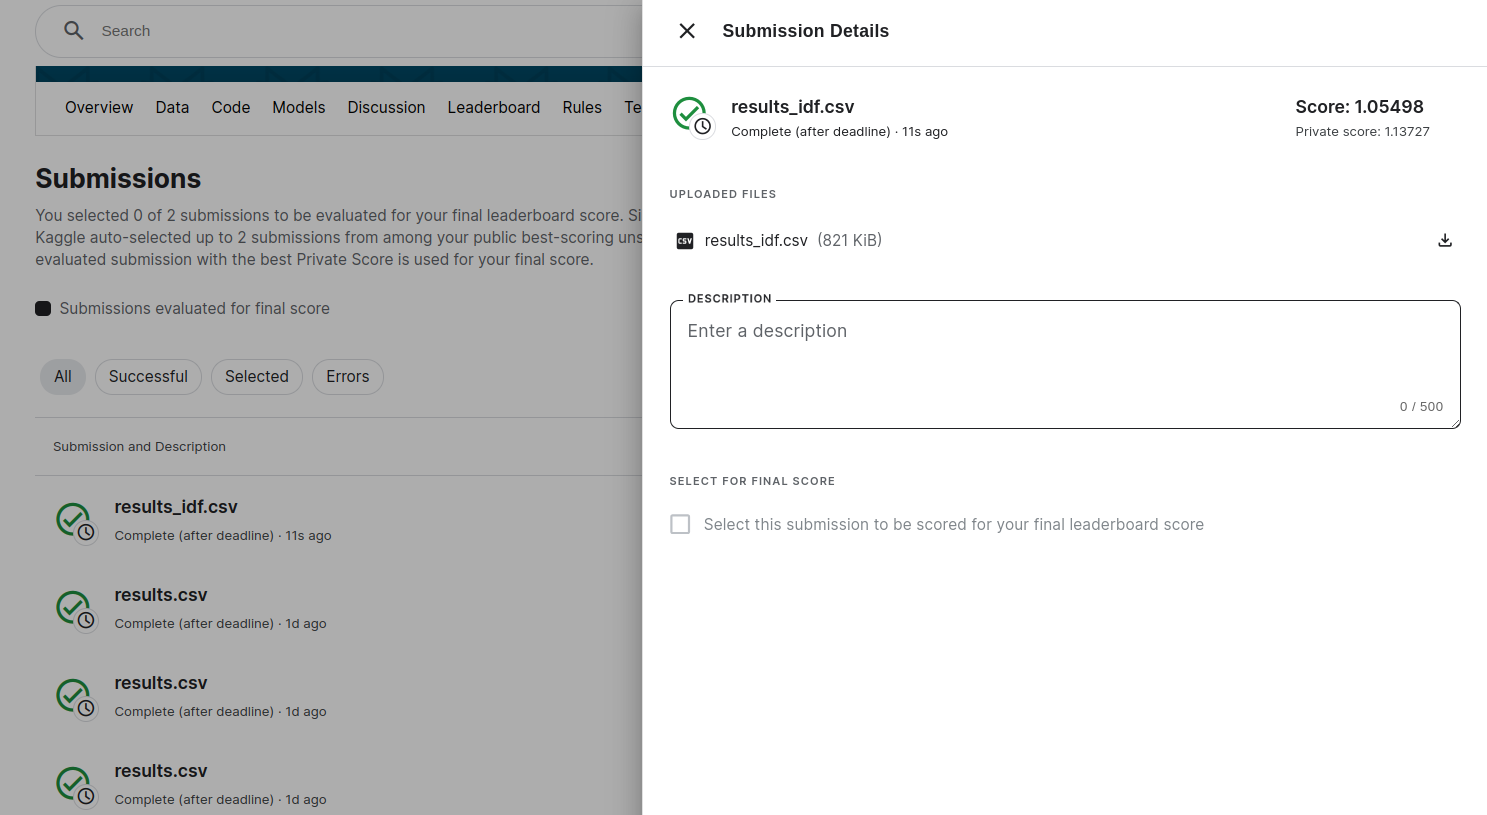

## Часть 3. 4 балла

Теперь давайте воспользуемся более продвинутыми методами обработки текстовых данных, которые мы проходили в нашем курсе. Обучите RNN/Transformer для предсказания пользовательской оценки.

Если будете обучать RNN, попробуйте ограничить максимальную длину предложения. Некоторые отзывы могут быть слишком длинные относительно остальных.

Чтобы пользоваться DataLoader, все его элементы должны быть одинаковой размерности. Для этого вы можете добавить нулевой паддинг ко всем предложениям (см пример pad_sequence)

### 🐱 Using RNN

#### 🐏 Preprocess data

In [ ]:
import torch
import numpy as np
from torch import nn
from torch.nn import functional as F

In [ ]:
MAX_LEN = 16

In [ ]:
def process_text(text):
    return [word for word in word_tokenize(text.lower())]# if word not in string.punctuation]

def process_text_limited(row):
  n = MAX_LEN // 2
  m = len(row['positive'])
  k = n
  if m <= n:
    val = row['positive']
    k = 2 * n - m
  else:
    val = row['positive'][:n]
  if len(row['negative']) <= k:
    val += row['negative']
  else:
    val += row['negative'][:k]
  return [word_tokenize(word.lower())[0] for word in val if word not in string.punctuation]

In [ ]:
df['negative'] = df['negative'].apply(process_text)
df['positive'] = df['positive'].apply(process_text)
df['text'] = df.apply(lambda row: process_text_limited(row), axis=1)

In [ ]:
df_competition['negative'] = df_competition['negative'].apply(process_text)
df_competition['positive'] = df_competition['positive'].apply(process_text)
df_competition['text'] = df_competition.apply(lambda row: process_text_limited(row), axis=1)

In [ ]:
df['text'][100]

['no', 'positive', 'honestly', 'the', 'bed', 'wasn', 't', 'comfortable']

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=777) # <- для локального тестирования

In [ ]:
WORDS = set()
for sent in list(df['positive']):
    for w in sent:
        WORDS.add(w)

for sent in list(df['negative']):
    for w in sent:
        WORDS.add(w)

for sent in list(df_competition['positive']):
    for w in sent:
        WORDS.add(w)

for sent in list(df_competition['negative']):
    for w in sent:
        WORDS.add(w)

In [ ]:
int2word = dict(enumerate(tuple(WORDS)))
word2int = {w: ii for ii, w in int2word.items()}

In [ ]:
word2int['positive']

1395

In [ ]:
# MAX_LEN = max(df['text'].apply(len))

In [ ]:
# MAX_LEN = max(df_competition['text'].apply(len))

In [ ]:
# MAX_LEN

734

In [ ]:
# MAX_LEN = 25

#### 🐜 Build dataloaders

In [ ]:
from collections import Counter
from torchtext.vocab import vocab
from torch.nn.utils.rnn import pad_sequence

class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, df):
        self.df = df
        self.specials = ('<pad>', '<unk>')

        counter = Counter(word for word in WORDS)
        self.vocab = vocab(counter, specials=self.specials)

        self.pad_index = self.vocab['<pad>']
        self.max_len = MAX_LEN

    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        idx_real = self.df.index[idx]
        encoded = [word2int[word] for word in self.df['text'][idx_real]][:MAX_LEN]
        padded = torch.full((self.max_len, ), self.pad_index, dtype=torch.int64)
        padded[:len(encoded)] = torch.tensor(encoded)
        return padded, len(encoded), self.df['score'][idx_real]

In [ ]:
BATCH_SIZE = 32

# train_dataset = ReviewsDataset(df_train)
# test_dataset = ReviewsDataset(df_test)

# train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
# test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

dataset = ReviewsDataset(df)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE)

comp_dataset = ReviewsDataset(df_competition)
comp_dataloader = torch.utils.data.DataLoader(comp_dataset, batch_size=1)

In [ ]:
#train_dataset.__getitem__(7000)
# dataset.__getitem__(7000)

#### 🦆 Build regression model with lstm

In [ ]:
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class REGLSTM(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, num_layers, max_len=MAX_LEN):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(input_size=embed_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        #self.rnn = nn.RNN(input_size=embed_dim, hidden_size=hidden_dim, batch_first=True)
        self.regressor = nn.Linear(hidden_dim, 1)

    def forward(self, tokens, lengths):
        '''
        B - batch size
        L - sequence length
        E - embedding dim
        H - hidden dim
        V - vocab size
        '''
         # tokens: (B, L)
        embeds = self.embedding(tokens)
        # embeds: (B, L, E) in padded form
        packed_embeds = pack_padded_sequence(embeds, lengths, batch_first=True, enforce_sorted=False)
        outputs, hidden = self.lstm(packed_embeds)
        # output: (B, L, H), hidden: (B, H) in packed form
        outputs, lengths = pad_packed_sequence(outputs, batch_first=True)
        results = self.regressor(outputs[:,-1:]).squeeze(1)
        # results: (B, L, V)
        return results

In [ ]:
from IPython.display import clear_output
import matplotlib.pyplot as plt

def plot_losses(train_losses, test_losses):
    clear_output()
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='train')
    plt.plot(range(1, len(test_losses) + 1), test_losses, label='test')
    plt.show()

#### 🐨 Training model REGLSTM

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
num_epochs = 17

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = REGLSTM(vocab_size=len(WORDS), max_len=MAX_LEN,
                    embed_dim=128, hidden_dim=128, num_layers=4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.L1Loss()

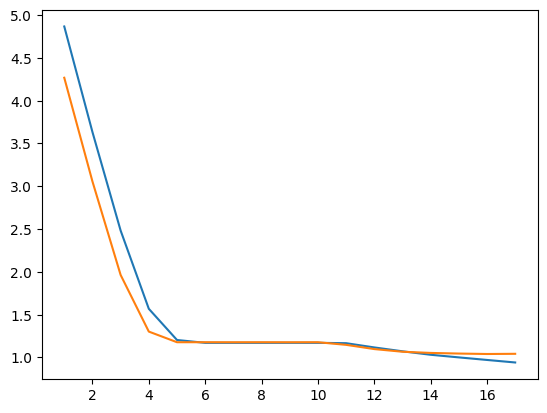

Best test loss: 1.0387874996811395


In [ ]:
train_losses, test_losses = [], []

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0
    for (tokens, lengths, scores) in tqdm(train_dataloader, desc=f'Training {epoch}/{num_epochs}'):
        optimizer.zero_grad()
        tokens = tokens.to(device)
        scores = scores.to(device)

        results = model(tokens, lengths)
        loss = criterion(results.squeeze(1), scores.to(torch.float))
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * tokens.shape[0]
    train_losses += [running_loss / len(train_dataloader.dataset)]
    #scheduler.step()

    model.eval()
    running_loss = 0.0
    for (tokens, lengths, scores) in tqdm(test_dataloader, desc=f'Testing {epoch}/{num_epochs}'):
        tokens = tokens.to(device)
        scores = scores.to(device)

        with torch.no_grad():
            results = model(tokens, lengths)
            loss = criterion(results.squeeze(1), scores.to(torch.float))

        running_loss += loss.item() * tokens.shape[0]

    test_losses += [running_loss / len(test_dataloader.dataset)]
    print('train_losses', train_losses)
    print('test_losses', test_losses)
    plot_losses(train_losses, test_losses)
print(f'Best test loss: {min(test_losses)}')

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/hse/DL/model_REGLSTM')

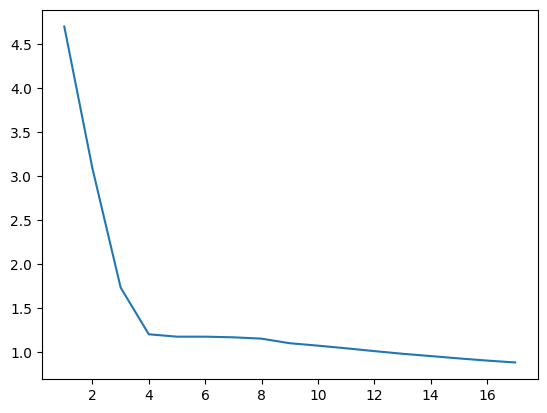

Best train loss: 0.8771725113635342


In [ ]:
train_losses, test_losses = [], []

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss = 0.0
    for (tokens, lengths, scores) in tqdm(dataloader, desc=f'Training {epoch}/{num_epochs}'):
        optimizer.zero_grad()
        tokens = tokens.to(device)
        scores = scores.to(device)

        results = model(tokens, lengths)
        loss = criterion(results.squeeze(1), scores.to(torch.float))
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * tokens.shape[0]
    train_losses += [running_loss / len(dataloader.dataset)]
    plot_losses(train_losses, test_losses)
print(f'Best train loss: {min(train_losses)}')

#### 🦧 Evaluate competition data

In [ ]:
model.eval()
comp_results = []
for (tokens, lengths,_) in tqdm(comp_dataloader, desc=f'Evaluate model'):
  tokens = tokens.to(device)
  with torch.no_grad():
    results = model(tokens, lengths)
    comp_results.append(results.squeeze(1))

Evaluate model:   0%|          | 0/20000 [00:00<?, ?it/s]

In [ ]:
comp_results_np = [i.cpu().numpy()[0] for i in comp_results]

In [ ]:
df_competition.shape

(20000, 5)

In [ ]:
df_res = df_competition.drop(['positive', 'negative', 'text'], axis=1)
df_res = df_res.assign(score=comp_results_np)
df_res

,review_id,score
0,00026f564b258ad5159aab07c357c4ca,4.462840
1,000278c73da08f4fcb857fcfe4ac6417,9.133820
2,000404f843e756fe3b2a477dbefa5bd4,4.892295
3,000a66d32bcf305148d789ac156dd512,5.438342
4,000bf1d8c5110701f459ffbedbf0d546,9.539900
...,...,...
19995,ffe8a7190aee6e3a53ee2e0145a91555,4.101799
19996,ffea0e2b84788c9df755efe8e2bedb23,9.079265
19997,fff3997a85a1eed7ae7a937bc945fcf0,9.147225
19998,fff673fe95ab8f3a0910f112549862e2,7.505147


In [ ]:
df_res.to_csv('/content/drive/MyDrive/hse/DL/results_comp.csv', index=False)

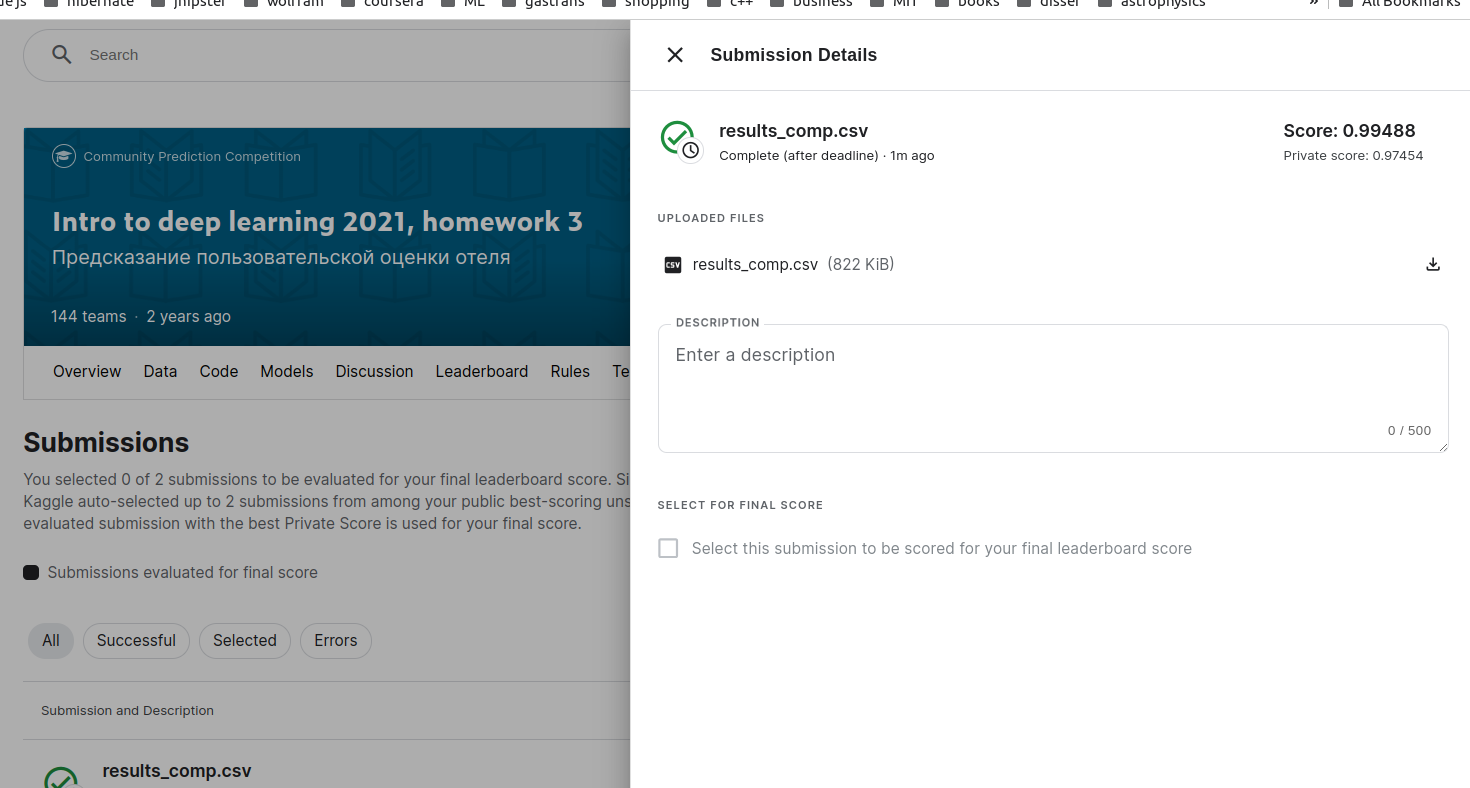

### 🐺 Using Transformer

#### 🦣 Preprocess data

In [ ]:
!pip install torchdata portalocker>=2.0.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tqdm.notebook import tqdm

plt.rcParams.update({'font.size': 14})
sns.set_style('whitegrid')

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess(text):
    text = list(filter(str.isalpha, word_tokenize(text.lower())))
    text = list(lemmatizer.lemmatize(word) for word in text)
    text = list(word for word in text if word not in stop_words)
    return ' '.join(text)

In [ ]:
df.positive.values[479]

' It was very nice experience Thanks for high quality of services and big thanks for Simon Charles and Alex '

In [ ]:
mask = df.apply(lambda row: len(row.positive.strip()) == 0 & len(row.negative.strip()) == 0, axis=1)
df = df[~mask]
df.shape

(99973, 4)

In [ ]:
df['text'] = df.apply(lambda row: row.positive + row.negative, axis=1)
df_competition['text'] = df_competition.apply(lambda row: row.positive + row.negative, axis=1)
df['lemmas'] = df.apply(lambda row: preprocess(row.text), axis=1)

In [ ]:
df['class'] = df.apply(lambda row: int(row.score <= 5), axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(df, df.score)
X_train, X_test, y_train, y_test = train_test_split(df, df['class'])

#### 🐧 Tokenize

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

def dataset_iterator(texts):
    for text in texts:
        yield text.split()

In [ ]:
X_train['lemmas']

52281                                location view bedroom
66826    central location good link tourist area biscui...
52608    place felt modern inviting food wa tasty staff...
56021    positive air condition controller room wa work...
83995                           nice clean tea coffee room
                               ...                        
59976    friendly helpful staff cool bar area comfortab...
32177    perfect location sightseeing city room quiet c...
90641    hotel uncommon design warm inviting room comfo...
16158    amazing quality price lovely staff great atmos...
10005    everything great time staff great friendly lit...
Name: lemmas, Length: 74979, dtype: object

In [ ]:
vocab = build_vocab_from_iterator(
    dataset_iterator(df['lemmas']),
    specials=['<pad>', '<unk>'], min_freq=10,
)

In [ ]:
train_tokens = []
for text in dataset_iterator(X_train['lemmas']):
    tokens = [vocab[word] if word in vocab else vocab['<unk>'] for word in text]
    train_tokens += [tokens]

test_tokens = []
for text in dataset_iterator(X_test['lemmas']):
    tokens = [vocab[word] if word in vocab else vocab['<unk>'] for word in text]
    test_tokens += [tokens]

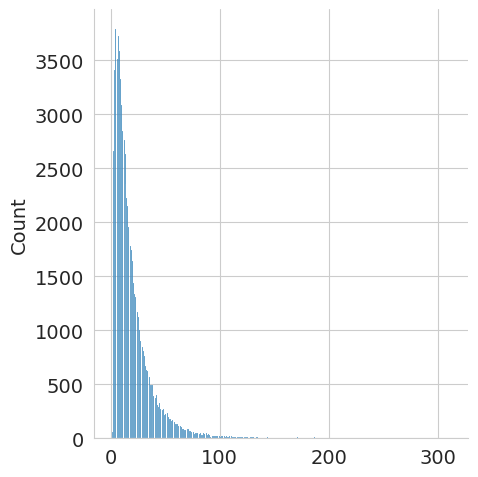

In [ ]:
lengths = np.array([len(tokens) for tokens in train_tokens])
sns.displot(lengths)
plt.show()

In [ ]:
df

,review_id,negative,positive,score,text,lemmas,class
0,00003c6036f30f590c0ac435efb8739b,There were issues with the wifi connection,No Positive,7.1,No Positive There were issues with the wifi co...,positive issue wifi connection,0
1,00004d18f186bf2489590dc415876f73,TV not working,No Positive,7.5,No Positive TV not working,positive tv working,0
2,0000cf900cbb8667fad33a717e9b1cf4,More pillows,Beautiful room Great location Lovely staff,10.0,Beautiful room Great location Lovely staff M...,beautiful room great location lovely staff pillow,0
3,0000df16edf19e7ad9dd8c5cd6f6925e,Very business,Location,5.4,Location Very business,location business,0
4,00025e1aa3ac32edb496db49e76bbd00,Rooms could do with a bit of a refurbishment ...,Nice breakfast handy for Victoria train stati...,6.7,Nice breakfast handy for Victoria train stati...,nice breakfast handy victoria train station si...,0
...,...,...,...,...,...,...,...
99995,fffd2d3cf4eaa0db822b90c4a723cc29,No coffee facilities in room Air Con didn t s...,Very quiet for a central London Hotel Comfy b...,7.9,Very quiet for a central London Hotel Comfy b...,quiet central london hotel comfy bed convenien...,0
99996,fffd71432446f2d027ab2f84f759cc66,The room was far too hot on the first night 2...,breakfast was fine welcome with cava was good,4.2,breakfast was fine welcome with cava was good...,breakfast wa fine welcome cava wa good room wa...,1
99997,fffdb752a9758baf09aa6487ab4d0780,Terrible worn out Mattress dust behind the he...,The well meaning staff,5.0,The well meaning staff Terrible worn out Matt...,well meaning staff terrible worn mattress dust...,1
99998,fffdd842f0b2780adec8ded4249cac6d,No Negative,Very profissional and nice staff Very well de...,9.6,Very profissional and nice staff Very well de...,profissional nice staff well decorated hotel p...,0


In [ ]:
max_length = 256
tokenized_train = torch.full((len(train_tokens), max_length), vocab['<pad>'], dtype=torch.int32)
for i, tokens in enumerate(train_tokens):
    length = min(max_length, len(tokens))
    tokenized_train[i, :length] = torch.tensor(tokens[:length])

tokenized_test = torch.full((len(test_tokens), max_length), vocab['<pad>'], dtype=torch.int32)
for i, tokens in enumerate(test_tokens):
    length = min(max_length, len(tokens))
    tokenized_test[i, :length] = torch.tensor(tokens[:length])

In [ ]:
targets_train = torch.tensor(y_train.values, dtype=torch.float)
targets_test = torch.tensor(y_test.values, dtype=torch.float)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(tokenized_train, targets_train)
test_dataset = TensorDataset(tokenized_test, targets_test)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False, num_workers=2, pin_memory=True)

#### 🦀 Transformer architecture

In [ ]:
import math
from torch import nn

class PositionalEncoder(nn.Module):
    # Adapted from: https://pytorch.org/tutorials/beginner/transformer_tutorial.html

    def __init__(self, max_length, embed_dim, dropout):
        super().__init__()
        self.pos_features = torch.zeros(max_length, embed_dim)

        positions = torch.arange(0, max_length, dtype=torch.float).unsqueeze(1)
        freqs = torch.exp(torch.arange(0, embed_dim, 2, dtype=torch.float) * \
                          (-math.log(10000) / embed_dim)).unsqueeze(0)

        arguments = positions * freqs
        self.pos_features[:, 0::2] = torch.sin(arguments)
        self.pos_features[:, 1::2] = torch.cos(arguments)
        self.pos_features = self.pos_features.unsqueeze(0)
        self.pos_features = nn.Parameter(self.pos_features, requires_grad=False)
        # pos_features: (1, max_length, embed_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, inputs):
        outputs = inputs + self.pos_features[:, :inputs.shape[1]]
        return self.dropout(outputs)

In [ ]:
class Attention(nn.Module):
    # Single-head attention
    def __init__(self, embed_dim, num_heads, dropout):
        super().__init__()
        attention_dim = embed_dim // num_heads

        self.WQ = nn.Linear(embed_dim, attention_dim, bias=False)
        self.WK = nn.Linear(embed_dim, attention_dim, bias=False)
        self.WV = nn.Linear(embed_dim, attention_dim, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, query, key, value, mask=None):
        # query, key, value: (batch_size, length, embed_dim)
        # mask: (batch_size, length, length)

        Q = self.WQ(query)
        K = self.WK(key)
        V = self.WV(value)
        # Q, K, V: (batch_size, length, attention_dim)

        norm_factor = math.sqrt(Q.shape[-1])
        dot_products = torch.bmm(Q, K.transpose(1, 2)) / norm_factor
        # dot_products: (batch_size, length, length)

        if mask is not None:
            dot_products = dot_products.masked_fill(mask, -math.inf)

        attention_score = nn.functional.softmax(dot_products, dim=-1)
        attention = torch.bmm(self.dropout(attention_score), V)
        # attention_score: (batch_size, length, length)
        # attention: (batch_size, length, attention_dim)

        return attention, attention_score


class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout):
        super(MultiHeadAttention, self).__init__()

        assert embed_dim % num_heads == 0
        self.attention_heads = nn.ModuleList([Attention(embed_dim, num_heads, dropout)
                                              for _ in range(num_heads)])

        self.linear = nn.Linear(embed_dim, embed_dim, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, query, key, value, mask=None):
        # query, key, value: (batch_size, length, embed_dim)
        # mask: (batch_size, length, length)
        attentions, attention_scores = [], []

        for head in self.attention_heads:
            attention, attention_score = head(query, key, value, mask)
            attentions += [attention]
            attention_scores += [attention_score]

        attentions = torch.cat(attentions, dim=-1)
        attention_scores = torch.stack(attention_scores, dim=-1)
        # attentions: (batch_size, length, embed_dim)
        # attention_scores: (batch_size, length, length, num_heads)

        outputs = self.linear(attentions)
        outputs = self.dropout(outputs)
        # outputs: (batch_size, length, embed_dim)

        return outputs, attention_scores

In [ ]:
def create_padding_mask(tokens, pad_idx=vocab['<pad>']):
    # tokens: (batch_size, length)
    length = tokens.shape[-1]
    padding_mask = (tokens == pad_idx)
    padding_mask = padding_mask.unsqueeze(1).repeat(1, length, 1)
    # padding_mask: (batch_size, length, length)

    return padding_mask

In [ ]:
class TransformerLayer(nn.Module):
    def __init__(self, embed_dim, fc_dim, num_heads, dropout):
        super().__init__()
        self.self_attention = MultiHeadAttention(embed_dim, num_heads, dropout)
        self.feedforward = nn.Sequential(
            nn.Linear(embed_dim, fc_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(fc_dim, embed_dim),
            nn.Dropout(dropout)
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, inputs, mask):
        attention, attention_score = self.self_attention(query=inputs, key=inputs,
                                                         value=inputs, mask=mask)
        outputs = inputs + attention
        outputs = self.norm1(outputs)
        outputs = outputs + self.feedforward(outputs)
        outputs = self.norm2(outputs)
        return outputs, attention_score


class Transformer(nn.Module):
    def __init__(self, vocab_size, max_length, num_classes,
                 embed_dim, fc_dim, num_heads, num_layers, dropout):
        super().__init__()
        self.embed_dim = embed_dim
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_encoder = PositionalEncoder(max_length, embed_dim, dropout)
        self.layers = nn.ModuleList([TransformerLayer(embed_dim, fc_dim, num_heads, dropout) \
                                     for _ in range(num_layers)])
        self.classifier = nn.Linear(embed_dim, num_classes)

    def forward(self, tokens):
        # source: (batch_size, length)
        embeds = self.embedding(tokens) * math.sqrt(self.embed_dim)
        outputs = self.pos_encoder(embeds)
        # outputs: (batch_size, length, embed_dim)

        padding_mask = create_padding_mask(tokens)
        attention_scores = []
        for layer in self.layers:
            outputs, attention_score = layer(outputs, padding_mask)
            attention_scores += [attention_score]
        attention_scores = torch.stack(attention_scores, dim=-1)
        # outputs: (batch_size, length, embed_dim)
        # attentions_scores: (batch_size, length, embed_dim, num_heads, num_layers)

        mask = (tokens != vocab['<pad>']).to(torch.float).detach()
        lengths = mask.sum(dim=1).detach()
        outputs = (outputs * mask.unsqueeze(2)).sum(dim=1) / lengths.unsqueeze(1)
        # outputs: (batch_size, embed_dim)

        logits = self.classifier(outputs)
        # logits: (batch_size, num_classes)

        return logits, attention_scores

In [ ]:
from IPython.display import clear_output

def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [ ]:
num_epochs = 30
warmup_epochs = 4

def lr_schedule(epoch):
    if epoch < warmup_epochs:
        return (epoch + 1) / (warmup_epochs + 1)
    return 0.5 * (1 + np.cos(np.pi * epoch / warmup_epochs))

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Transformer(vocab_size=len(vocab), max_length=max_length, num_classes=1,
                    embed_dim=128, fc_dim=128, num_heads=8, num_layers=4, dropout=0.2).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_schedule)
#criterion = nn.BCELoss()
criterion = nn.L1Loss()

In [ ]:
sum(param.numel() for param in model.parameters())

1200385

#### 🦘 Train transformer

In [ ]:
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss, running_accuracy = 0.0, 0.0
    for tokens, labels in tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}'):
        optimizer.zero_grad()
        tokens = tokens.to(device)
        labels = labels.to(device)

        logits, _ = model(tokens)
        #probs = torch.sigmoid(logits.squeeze(1))
        if logits.isnan().sum() > 0:
          print('logits', logits)
          break
        loss = criterion(logits.squeeze(1), labels.to(torch.float))
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * tokens.shape[0]
        #running_accuracy += ((probs > 0.5).to(torch.int) == labels).sum().item()

    train_losses += [running_loss / len(train_loader.dataset)]
    train_accuracies += [running_accuracy / len(train_loader.dataset)]
    scheduler.step()

    model.eval()
    running_loss, running_accuracy = 0.0, 0.0
    for tokens, labels in tqdm(test_loader, desc=f'Testing {epoch}/{num_epochs}'):
        tokens = tokens.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            logits, _ = model(tokens)
            #probs = torch.sigmoid(logits.squeeze(1))
            loss = criterion(logits.squeeze(1), labels.to(torch.float))

        running_loss += loss.item() * tokens.shape[0]
        #running_accuracy += ((probs > 0.5).to(torch.int) == labels).sum().item()

    test_losses += [running_loss / len(test_loader.dataset)]
    #test_accuracies += [running_accuracy / len(test_loader.dataset)]
    #plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)

print(f'Best test accuracy: {max(test_accuracies)}')

Training 1/30:   0%|          | 0/586 [00:00<?, ?it/s]

logits tensor([[ 0.0695],
        [ 0.0607],
        [ 0.0620],
        [-0.0046],
        [-0.0248],
        [ 0.0475],
        [ 0.0222],
        [ 0.0780],
        [-0.0447],
        [ 0.0072],
        [-0.0060],
        [ 0.0587],
        [ 0.0648],
        [ 0.0117],
        [ 0.0352],
        [ 0.0035],
        [-0.0194],
        [ 0.0230],
        [-0.0138],
        [ 0.0372],
        [-0.0304],
        [ 0.0226],
        [ 0.0215],
        [-0.0308],
        [ 0.2688],
        [ 0.0124],
        [ 0.0377],
        [-0.0649],
        [ 0.0029],
        [-0.0083],
        [ 0.0217],
        [-0.0059],
        [-0.0209],
        [-0.2282],
        [-0.0218],
        [ 0.0024],
        [-0.0455],
        [ 0.1092],
        [ 0.0293],
        [-0.0461],
        [-0.0423],
        [ 0.1114],
        [-0.0352],
        [-0.0352],
        [-0.0194],
        [-0.0133],
        [-0.0006],
        [ 0.0430],
        [ 0.0269],
        [-0.0163],
        [ 0.0683],
        [-0.2201],
     

Testing 1/30:   0%|          | 0/196 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

Не получилось обучить трансформер, во время backprop выходили nan((

## Контест (до 3 баллов)

По итогам всех ваших экспериментов выберите модель, которую считаете лучшей. Сделайте сабмит в контест. В зависимости от вашего скора на публичном лидерборде, мы начислим вам баллы:

 - <0.76 - 3 балла
 - [0.76; 0.78) - 2 балла
 - [0.78; 0.8) - 1 балл

#### 🦩 Install need packages

In [5]:
! pip install torch

In [6]:
! pip install -U accelerate
! pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [7]:
import accelerate
import transformers

transformers.__version__, accelerate.__version__

('4.35.0', '0.24.1')

#### 🐋 Preprocess data

In [8]:
import torch
import numpy as np
from torch import nn
from torch.nn import functional as F

In [9]:
df['text'] = df['positive'] + df['negative']
df['text']

0        No Positive There were issues with the wifi co...
1                               No Positive TV not working
2         Beautiful room Great location Lovely staff  M...
3                                   Location Very business
4         Nice breakfast handy for Victoria train stati...
                               ...                        
99995     Very quiet for a central London Hotel Comfy b...
99996     breakfast was fine welcome with cava was good...
99997     The well meaning staff Terrible worn out Matt...
99998     Very profissional and nice staff Very well de...
99999     Great breakfast and the rooms are clean Locat...
Name: text, Length: 100000, dtype: object

In [10]:
df_competition['text'] = df_competition['positive'] + df_competition['negative']
df_competition['text']

0         Just the location  Other than the location ev...
1         Great location very comfortable clean breakfa...
2         The breakfast booked the preceding night but ...
3         Great location Nice bathroom Noisy various el...
4             Great location and friendly staffNo Negative
                               ...                        
19995    No Positive Check in Staff not consistant with...
19996     Great location on the Piccadilly Line so easy...
19997     Great location very nice design great breakfa...
19998     The entrance area looks great and the ground ...
19999     It is big the staff is kind The food is good ...
Name: text, Length: 20000, dtype: object

**References:**

https://lajavaness.medium.com/regression-with-text-input-using-bert-and-transformers-71c155034b13

https://huggingface.co/docs/transformers/training

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding
from torch.utils.data import DataLoader

BASE_MODEL = "bert-base-cased"
LEARNING_RATE = 2e-5
MAX_LENGTH = 256
BATCH_SIZE = 16
EPOCHS = 1

model = AutoModelForSequenceClassification.from_pretrained(BASE_MODEL, num_labels=1)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

In [13]:
def preprocess_function(examples):
    label = examples["score"]
    examples = tokenizer(examples["text"], truncation=True, padding="max_length", max_length=256)
    examples["label"] = label
    return examples

In [14]:
df['text_token'] = df.apply(preprocess_function, axis=1)

#### 🐖 Prepare training

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def compute_metrics_for_regression(eval_pred):
    logits, labels = eval_pred
    labels = labels.reshape(-1, 1)

    mse = mean_squared_error(labels, logits)
    mae = mean_absolute_error(labels, logits)
    r2 = r2_score(labels, logits)
    single_squared_errors = ((logits - labels).flatten()**2).tolist()

    # Compute accuracy
    # Based on the fact that the rounded score = true score only if |single_squared_errors| < 0.5
    accuracy = sum([1 for e in single_squared_errors if e < 0.25]) / len(single_squared_errors)

    return {"mse": mse, "mae": mae, "r2": r2, "accuracy": accuracy}

In [17]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer",
                                  learning_rate=LEARNING_RATE,
                                  per_device_train_batch_size=BATCH_SIZE,
                                  per_device_eval_batch_size=BATCH_SIZE,
                                  num_train_epochs=EPOCHS,
                                  evaluation_strategy="epoch",
                                  save_strategy="epoch",
                                  save_total_limit=2,
                                  metric_for_best_model="accuracy",
                                  load_best_model_at_end=True,
                                  weight_decay=0.01,)

In [18]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=777) # <- для локального тестирования

In [19]:
class RegressionTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs[0][:, 0]
        loss = torch.nn.functional.mse_loss(logits, labels)
        return (loss, outputs) if return_outputs else loss

#### 🐥 Training

In [20]:
trainer = RegressionTrainer(
    model=model,
    args=training_args,
    train_dataset=df_train['text_token'].values,
    eval_dataset=df_test['text_token'].values,
    compute_metrics=compute_metrics_for_regression,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Mse,Mae,R2,Accuracy
1,1.036100,0.997243,0.997243,0.719840,0.632243,0.487800


TrainOutput(global_step=4688, training_loss=1.469336753819176, metrics={'train_runtime': 1159.9653, 'train_samples_per_second': 64.657, 'train_steps_per_second': 4.042, 'total_flos': 9866575987200000.0, 'train_loss': 1.469336753819176, 'epoch': 1.0})

#### 🦙 Evaluate competition data

In [52]:
encoded = tokenizer(df_competition['text'].values[19999], truncation=True, padding="max_length", max_length=256, return_tensors="pt").to("cuda")
print(model(**encoded).logits.cpu().detach().numpy()[0][0])

7.8166504


In [54]:
# comp_results = []
# for i in range(df_competition.shape[0]):
#   encoded = tokenizer(df_competition['text'].values[i], truncation=True, padding="max_length", max_length=256, return_tensors="pt").to("cuda")
#   comp_results.append(model(**encoded).logits.cpu().detach().numpy()[0][0])

In [55]:
comp_results = [model(**tokenizer(item, truncation=True, padding="max_length", max_length=256, return_tensors="pt").to("cuda")).logits.cpu().detach().numpy()[0][0] for item in df_competition['text'].values]

In [56]:
comp_results[:10]

[3.8565285,
 9.790039,
 6.4480286,
 6.408653,
 9.619717,
 9.769764,
 9.322498,
 9.532107,
 7.740156,
 10.073462]

In [59]:
df_res = df_competition.drop(['positive', 'negative', 'text', 'text_token'], axis=1)
df_res = df_res.assign(score=comp_results)
df_res

,review_id,score
0,00026f564b258ad5159aab07c357c4ca,3.856529
1,000278c73da08f4fcb857fcfe4ac6417,9.790039
2,000404f843e756fe3b2a477dbefa5bd4,6.448029
3,000a66d32bcf305148d789ac156dd512,6.408653
4,000bf1d8c5110701f459ffbedbf0d546,9.619717
...,...,...
19995,ffe8a7190aee6e3a53ee2e0145a91555,6.159945
19996,ffea0e2b84788c9df755efe8e2bedb23,9.520109
19997,fff3997a85a1eed7ae7a937bc945fcf0,9.805283
19998,fff673fe95ab8f3a0910f112549862e2,6.711071


In [60]:
df_res.to_csv('/content/drive/MyDrive/hse/DL/results_comp_bert.csv', index=False)

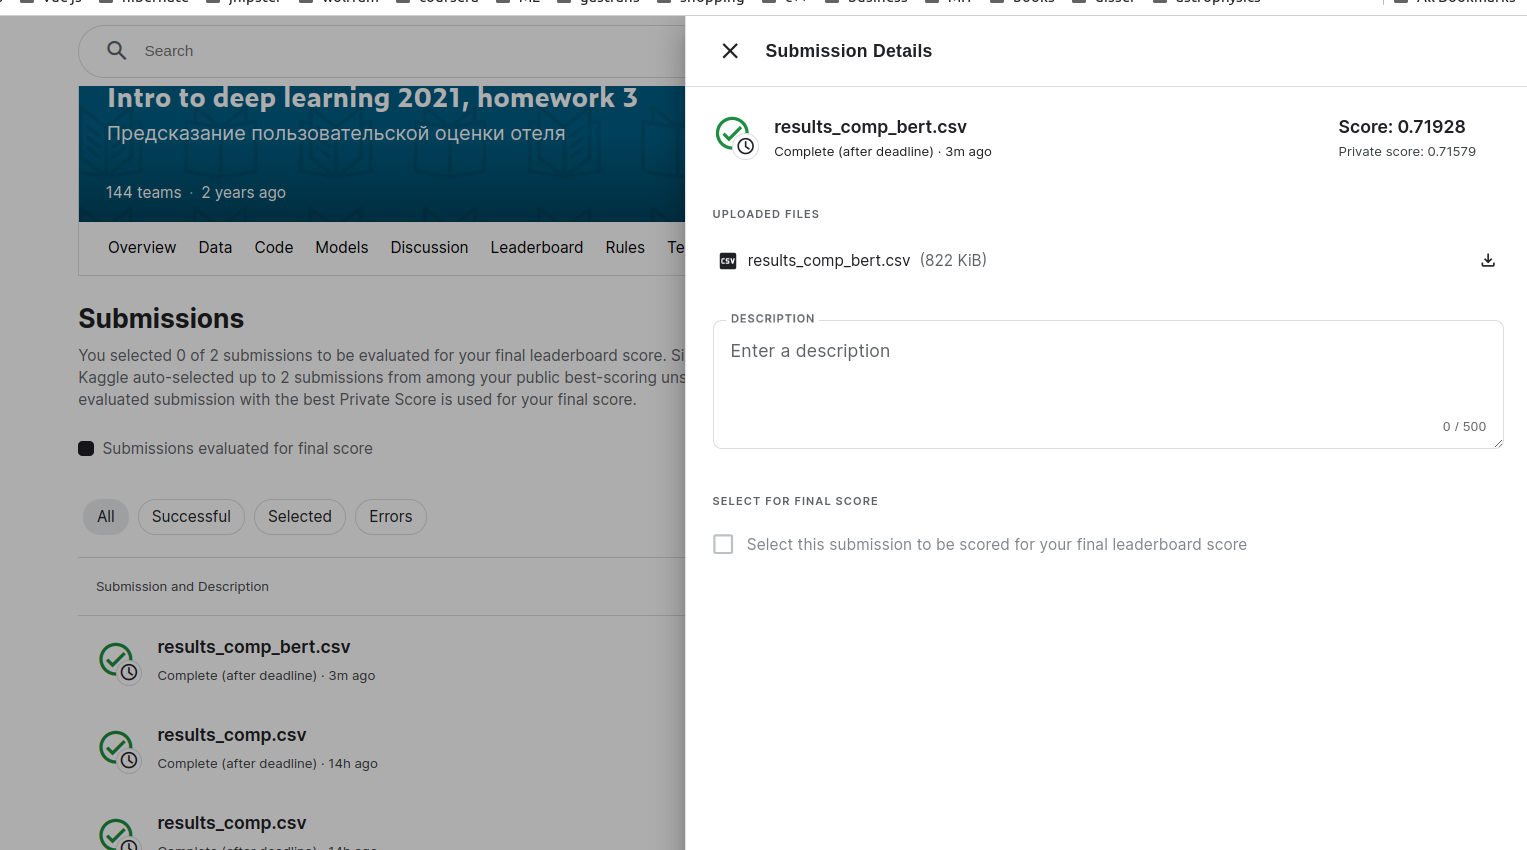

# Спасибо за проверку ДЗ!

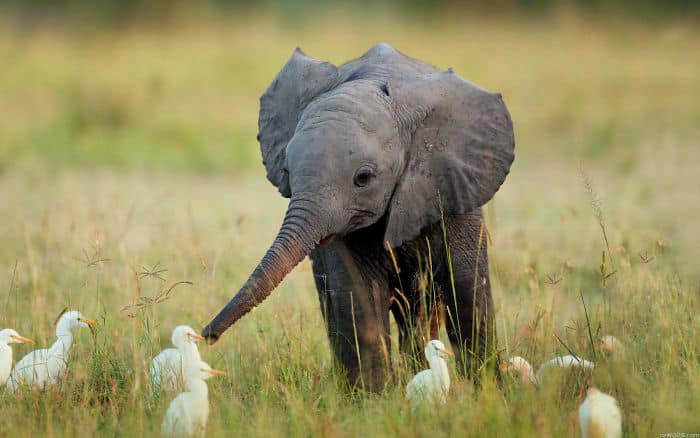